In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import glob
import import_ipynb as ipynb
import n_most_similar_games
import eric_charlie_file
#from ipynb.fs.full.n_most_similar_games import get_ratings, most_similar
#from ipynb.fs.full.eric_charlie_file import make_abbr
from bs4 import BeautifulSoup
from collections import Counter

CAL_OFF = 80
OPP_DEF = 75
#NOTE: EPV CAPS ROUGHLY AT 5 BC EXTRA POINT IS NOT ACCOUNTED FOR?? BRING UP AT MEETING


importing Jupyter notebook from n_most_similar_games.ipynb


/Users/jeremylevitt/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/jeremylevitt/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


importing Jupyter notebook from eric_charlie_file.ipynb


In [25]:
temp = []
data = []
subpxp = []
for year in range(2008,2018):    
    path ='Improved-NCAA-Football-Data/' + str(year) + 'PXP' # use your path
    allFiles = glob.glob(path + "/*.csv")
    frame = pd.DataFrame()
    list_ = []
    cols = ['gameId', 'driveIndex', 'year', 'week', 'clock', 'quarter', 'down', 'yardLine', 'distance', 'yardsGained',
            'offenseTeam', 'defenseTeam', 'description', 'type',
            'homeScore', 'awayScore', 'homeTeam', 'awayTeam']
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0, usecols=cols)
        list_.append(df)
        subpxp = pd.concat(list_, ignore_index=True)
    temp.append(subpxp)
    data= pd.concat(temp, ignore_index=True)

In [16]:
import cal_football as cf
pxp = cf.extract_data(data)
badyard = ~((pxp['yrdline100']>=100)|(pxp['yrdline100']<=0))
# possession_values = cf.get_possession_value(ko_and_pos)

In [23]:
game_data, rating_data, pxp_data = get_ratings()
games_compared, matchup_pxp = most_similar(off_rating = CAL_OFF, def_rating = OPP_DEF, n = 100, game_data = game_data, rating_data = rating_data)
for list_ in games_compared:
    away_team = list_[0]
    home_team = list_[1]
    year = list_[2]
    if list_[3]:
        #home team should be on offense, delete all rows of pxp that have hometeam on defense
        matchup_pxp = matchup_pxp[((matchup_pxp['offenseTeam'] != away_team) & (matchup_pxp['defenseTeam'] != home_team) & (matchup_pxp['year'] != year))]
matchup_pxp = cf.extract_data(matchup_pxp)
matchup_pxp

/Users/jeremylevitt/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/jeremylevitt/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


ExPointResult FieldGoalDistance  FieldGoalResult Safety  Touchdown  \
0              NaN               NaN              NaN      0          0   
1              NaN               NaN              NaN      0          0   
2              NaN               NaN              NaN      0          0   
3              NaN               NaN              NaN      0          0   
9              NaN               NaN              NaN      0          0   
10             NaN               NaN              NaN      0          0   
11             NaN               NaN              NaN      0          0   
12             NaN               NaN              NaN      0          0   
13             NaN               NaN              NaN      0          0   
14             NaN               NaN              NaN      0          0   
20             NaN               NaN              NaN      0          0   
21             NaN               NaN              NaN      0          0   
22             NaN               NaN              NaN      0          0   
28             NaN               NaN              NaN      0          0   
29             NaN               NaN              NaN      0          0   
30             NaN               NaN              NaN      0          0   
31             NaN               NaN              NaN      0          0   
32             NaN               NaN              NaN      0          0   
33             NaN               NaN              NaN      0          0   
47             NaN               NaN              NaN      0          0   
48             NaN               NaN              NaN      0          0   
49             NaN               NaN              NaN      0          0   
50             NaN               NaN              NaN      0          0   
51             NaN               NaN              NaN      0          0   
52             NaN               NaN              NaN      0          0   
53             NaN               NaN              NaN      0          0   
63             NaN               NaN              NaN      0          0   
64             NaN               NaN              NaN      0          0   
71             NaN               NaN              NaN      0          0   
72             NaN               NaN              NaN      0          0   
...            ...               ...              ...    ...        ...   
6063           NaN               NaN              NaN      0          0   
6064           NaN               NaN              NaN      0          0   
6065           NaN                18              NaN      0          0   
6066           NaN               NaN              NaN      0          0   
6073           NaN               NaN              NaN      0          0   
6074           NaN               NaN              NaN      0          0   
6075           NaN               NaN              NaN      0          0   
6076           NaN               NaN              NaN      0          0   
6077           NaN               NaN              NaN      0          0   
6078           NaN               NaN              NaN      0          0   
6085           NaN               NaN              NaN      0          0   
6086           NaN               NaN              NaN      0          0   
6087           NaN               NaN              NaN      0          0   
6088           NaN               NaN              NaN      0          0   
6089           NaN               NaN              NaN      0          0   
6090           NaN               NaN              NaN      0          0   
6097           NaN               NaN              NaN      0          0   
6098           NaN               NaN              NaN      0          0   
6099           NaN               NaN              NaN      0          0   
6100           NaN               NaN              NaN      0          0   
6101           NaN               NaN              NaN      0          1   
6102          Made            

In [7]:
ko_and_poss = cf.extract_kickoffs_and_possessions(pxp)
fgs = cf.extract_field_goals(pxp)
third_downs = cf.extract_third_downs(pxp)
punts = cf.extract_punts(pxp)

ekv,epv_model = cf.epv_model(ko_and_poss)
exp_conv_pct_model = cf.exp_conv_pct_model(third_downs)
exp_net_punt_dist_model = cf.exp_net_punt_dist_model(punts)
exp_fg_prob_model = cf.exp_fg_prob_model(fgs)


/Users/jeremylevitt/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [ ]:
m_ko_and_poss = cf.extract_kickoffs_and_possessions(matchup_pxp)
m_fgs = cf.extract_field_goals(matchup_pxp)
m_third_downs = cf.extract_third_downs(matchup_pxp)
m_punts = cf.extract_punts(pxp)

m_ekv, m_epv_model = cf.epv_model(m_ko_and_poss)
m_exp_conv_pct_model = cf.exp_conv_pct_model(m_third_downs)
m_exp_net_punt_dist_model = cf.exp_net_punt_dist_model(m_punts)
m_exp_fg_prob_model = cf.exp_fg_prob_model(m_fgs)

In [5]:
exp_conv_pct_model


yrdregion  distance
Inside10   0           0.942356
           1           0.739358
           2           0.500808
           3           0.431020
           4           0.371377
           5           0.321551
           6           0.292112
           7           0.275232
           8           0.237733
           9           0.195546
10to20     0           0.937942
           1           0.806801
           2           0.672468
           3           0.568775
           4           0.512127
           5           0.460760
           6           0.415937
           7           0.378685
           8           0.358231
           9           0.340012
Beyond20   0           0.892862
           1           0.771204
           2           0.653179
           3           0.573224
           4           0.527236
           5           0.485496
           6           0.445375
           7           0.412626
           8           0.386669
           9           0.361430
Name: ExpConvPct, dt

In [6]:
epv_model.to_pickle("./epv_model.pkl")
exp_conv_pct_model.to_pickle("./exp_conv_pct_model.pkl")
exp_net_punt_dist_model.to_pickle("./exp_net_punt_dist_model.pkl")
exp_fg_prob_model.to_pickle("./exp_fg_prob_model.pkl")


In [ ]:
m_epv_model.to_pickle("./m_epv_model.pkl")
m_exp_conv_pct_model.to_pickle("./m_exp_conv_pct_model.pkl")

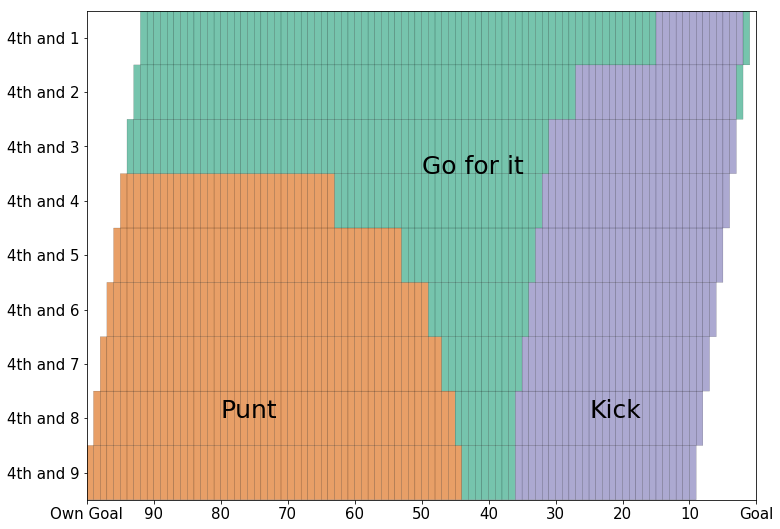

In [7]:
def build_decision_maker(ekv, epv_model, exp_conv_pct_model, 
                         exp_net_punt_dist_model, exp_fg_prob_model,
                        m_ekv, m_epv_model, m_exp_conv_pct_model, w):
    
    YRDSTOGO_CAP = 10  # Model restriction
    PUNT_LIM = 29      # Model restriction
    FG_LIM = 63        # Model restriction
    FG_OFFSET = 8      # Field goal placement distance (not including the 10 for the endzone)
    FG_FAIL_RESET = 0  # Where the ball is placed after a failed field goal.  If 0, at the spot.  
                       # Otherwise, at the spot or at the reset spot, whichever is better.
    
    def decision_maker(yrdline100, ydstogo, print_message=False):
        if yrdline100 < 10:
            region = 'Inside10'
        elif yrdline100 < 20:
            region = '10to20'
        else:
            region = 'Beyond20'
            
        # 1. Expected value of going for it
        
        # Value of failing (approximately turning over at same spot)
        conv_fail_yrdline100 = 100 - yrdline100
        conv_fail_epv = -epv_model[conv_fail_yrdline100] 
        
        m_conv_fail_epv = -m_epv_model[conv_fail_yrdline100]
        
        # Value of converting (approximately at the first down marker)
        if yrdline100 == ydstogo:
            conv_succ_epv = 6 - ekv
            m_conv_succ_epv = 6 - m_ekv
        else:
            first_down_yrdline100 = yrdline100 - ydstogo
            conv_succ_epv = epv_model[first_down_yrdline100] -1
            m_conv_succ_epv = m_epv_model[first_down_yrdline100] - 1

        # Conversion Pct
        exp_conv_pct = exp_conv_pct_model[(region, ydstogo)] if ydstogo < YRDSTOGO_CAP else None
        m_exp_conv_pct = m_exp_conv_pct_model[(region, ydstogo)] if ydstogo < YRDSTOGO_CAP else None
        
        # Overall expected value of going for it
        unmod_go_ev = exp_conv_pct * conv_succ_epv + (1 - exp_conv_pct) * conv_fail_epv
        m_go_ev = m_exp_conv_pct * m_conv_succ_epv + (1 - m_exp_conv_pct) * m_conv_fail_epv
        go_ev = w * m_go_ev + (1 - w) * unmod_go_ev
        ####THIS IS WHERE YOU ADD THE MATCHUP EPV WEIGHT AND STUFF (ABOVE)
        
        
        
        
        # 2. Expected value of punting
        
        # Expected next yardline
        if yrdline100 >= PUNT_LIM:
            exp_net_punt_dist = exp_net_punt_dist_model[yrdline100]
            exp_yrdline100 = 100 - yrdline100 + int(exp_net_punt_dist)
            
            # Overall expected value of punting
            punt_ev = -epv_model[exp_yrdline100]
        else:
            punt_ev = None
            
        # 3. Expected value of kicking a field goal
        fg_dist =  yrdline100 + 10 + FG_OFFSET
        if fg_dist <= FG_LIM:
            # Probability of success
            exp_fg_prob = exp_fg_prob_model[fg_dist ]

            # Expected value of field success
            fg_succ_epv = 3 - ekv

            # EPV of field goal fail
            fg_fail_yrdline100 = 100 - yrdline100 - FG_OFFSET
            fg_fail_epv = -epv_model[fg_fail_yrdline100]

            # Overall expected value kicking
            fg_ev = fg_succ_epv * exp_fg_prob + fg_fail_epv * (1 - exp_fg_prob)
        else:
            fg_ev = None
    
        choices = [('go for it', go_ev), ('punt', punt_ev), ('kick', fg_ev)]
        max_val = -100
        for choice, ev in choices:
            if ev is None:
                continue
            if ev > max_val:
                max_val = ev
                decision = choice
    
        if print_message:
            print("Expected Values")
            print("Go for it: {:.2f}".format(go_ev))
            if punt_ev is not None:
                print("Punt: {:.2f}".format(punt_ev))
            else:
                print("Punt: TOO CLOSE TO PUNT")
            if fg_ev is not None:
                print("FG: {:.2f}".format(fg_ev))
            else:
                print("FG: TOO FAR TO KICK")        

            print()
            print("Coach, you should:")
            print(decision.upper())

        return decision
    
    return decision_maker

# Build the decision maker
decision_maker = build_decision_maker(
    ekv, epv_model, exp_conv_pct_model, exp_net_punt_dist_model, exp_fg_prob_model, m_ekv, m_epv_model, m_exp_conv_pct_model, 0.05),

yrdlines = list(range(1, 100))
down_dist = list(range(1, 10))

decisions = []
for yrdstogo in down_dist:
    tmp = []
    for yrdline in yrdlines:
        if (yrdline >= yrdstogo) and (100 - yrdline + yrdstogo >= 10): # Exclude impossible scenarios
            decision = decision_maker(yrdline, yrdstogo)
            tmp.append(decision)
        else:
            tmp.append(None)
    decisions.append(tmp)
# Convert to a table
pd.DataFrame(decisions, columns=yrdlines, index=down_dist)

import numpy as np
data = np.zeros((9, 99))
for i in range(9):
    for j in range(99):
        decision = decisions[i][j]
        if decision == 'go for it':
            val = 1
        elif decision == 'punt':
            val = 2
        elif decision == 'kick':
            val = 3
        elif decision is None:
            val = np.nan
        data[i, j] = val
data = data[::-1,::-1]

fig, ax = plt.subplots(figsize=(12, 9))

ax.pcolor(
    data,
    vmin=1,
    vmax=8,
    edgecolors='k', 
    linewidths=.2,
    cmap=plt.get_cmap('Dark2'),
    alpha=.6
);
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xticklabels(['Own Goal', '90', '80', '70', '60', '50', '40', '30', '20', '10', 'Goal'])
ax.set_yticks([
    yd - .5
    for yd in range(1, 10)
])
ax.set_yticklabels([
    '4th and {}'.format(yd)
    for yd in range(9, 0, -1)
])
ax.text(50, 6, 'Go for it', size=25)
ax.text(20, 1.5, 'Punt', size=25)
ax.text(75, 1.5, 'Kick', size=25)
ax.tick_params(axis='both', which='major', labelsize=15);